In [1]:
import numpy as np, seaborn as sns, matplotlib.pyplot as plt, pandas as pd

import sys
sys.path.append('/ahg/regevdata/projects/CRISPR-libraries/prj2/evolution/abe8e/src/')
import b_convert_sam_to_text as parent_script
import _config

design_df = pd.read_csv(_config.DATA_DIR + 'exp_design.csv')

Using data folder:
 /ahg/regevdata/projects/CRISPR-libraries/prj2/evolution/abe8e/data/


In [2]:
ddf = dict()
mdf = pd.DataFrame()
for nm in design_df['Short name']:
    df = pd.read_csv(parent_script.out_dir + f'tada_context/n_{nm}.csv', index_col = 0)
    df['Condition'] = nm
    ddf[nm] = df
    
    mdf = mdf.append(df, ignore_index = True)
    
pv_df = mdf.pivot(index = 'Condition', columns = 'Position (0 based)', values = 'Read count')

In [3]:
pv_df = pv_df.fillna(value = 0)

In [4]:
median_poswise_rcs = list(pv_df.apply(np.median, axis = 'columns'))

with open(parent_script.out_dir + f'tada_context/_median_poswise_rcs.txt', 'w') as f:
    f.write('\n'.join([f'{int(s):,}' for s in median_poswise_rcs]))

## s

In [5]:
fmdf = pd.DataFrame()
for nm in design_df['Short name']:
    df = pd.read_csv(parent_script.out_dir + f'tada_context/n_{nm}.csv', index_col = 0)
    df['Condition'] = nm
    df['Read count'] /= max(df['Read count'])
    df = df.fillna(value = 0)
    
    fmdf = fmdf.append(df, ignore_index = True)
    
fpv_df = fmdf.pivot(index = 'Condition', columns = 'Position (0 based)', values = 'Read count')

In [6]:
# fpv_df['Condition'] = fpv_df.index

In [7]:
# dfm = fpv_df.melt(id_vars = ['Condition'])
dfm = fpv_df.melt(value_name = 'Normalized read count')

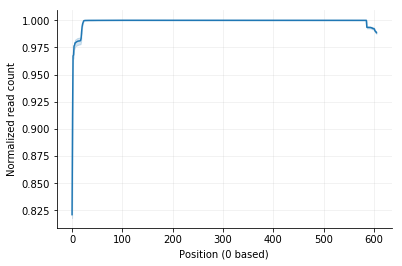

In [9]:
sns.lineplot(
    x = 'Position (0 based)',
    y = 'Normalized read count',
    data = dfm,
)
sns.despine()
plt.grid(alpha = 0.2)